In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [22]:
np.random.seed(42)

In [23]:
print("Step 1: Data Preparation")
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Step 1: Data Preparation


In [24]:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].apply(lambda x: target_names[x])

In [25]:
print(f"Dataset shape: {iris_df.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")
print("\nSample data:")
print(iris_df.head())

Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

Sample data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (105, 4)
Testing set size: (45, 4)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nStandardized features statistics:")
print(f"Mean: {np.mean(X_train_scaled, axis=0)}")
print(f"Standard deviation: {np.std(X_train_scaled, axis=0)}")


Standardized features statistics:
Mean: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
Standard deviation: [1. 1. 1. 1.]


In [28]:
def evaluate_models(X_train, X_test, y_train, y_test, title="Model Evaluation"):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42)
    }

    results = {}
    print(f"\n{title}")
    print("-" * 100)
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 100)

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': cm
        }

        print(f"{name:<20} {accuracy:.4f}     {precision:.4f}     {recall:.4f}     {f1:.4f}")

    # Plot confusion matrices
    plt.figure(figsize=(15, 10))
    for i, (name, result) in enumerate(results.items(), 1):
        plt.subplot(2, 2, i)
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names)
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_')}_confusion_matrices.png")

    return results


Step 2: Model Training & Evaluation (No Dimensionality Reduction)

Models with Original Features
----------------------------------------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score  
----------------------------------------------------------------------------------------------------
Logistic Regression  0.9111     0.9155     0.9111     0.9107
Decision Tree        0.9111     0.9155     0.9111     0.9107
Random Forest        0.8889     0.8981     0.8889     0.8878
SVM                  0.9333     0.9345     0.9333     0.9333


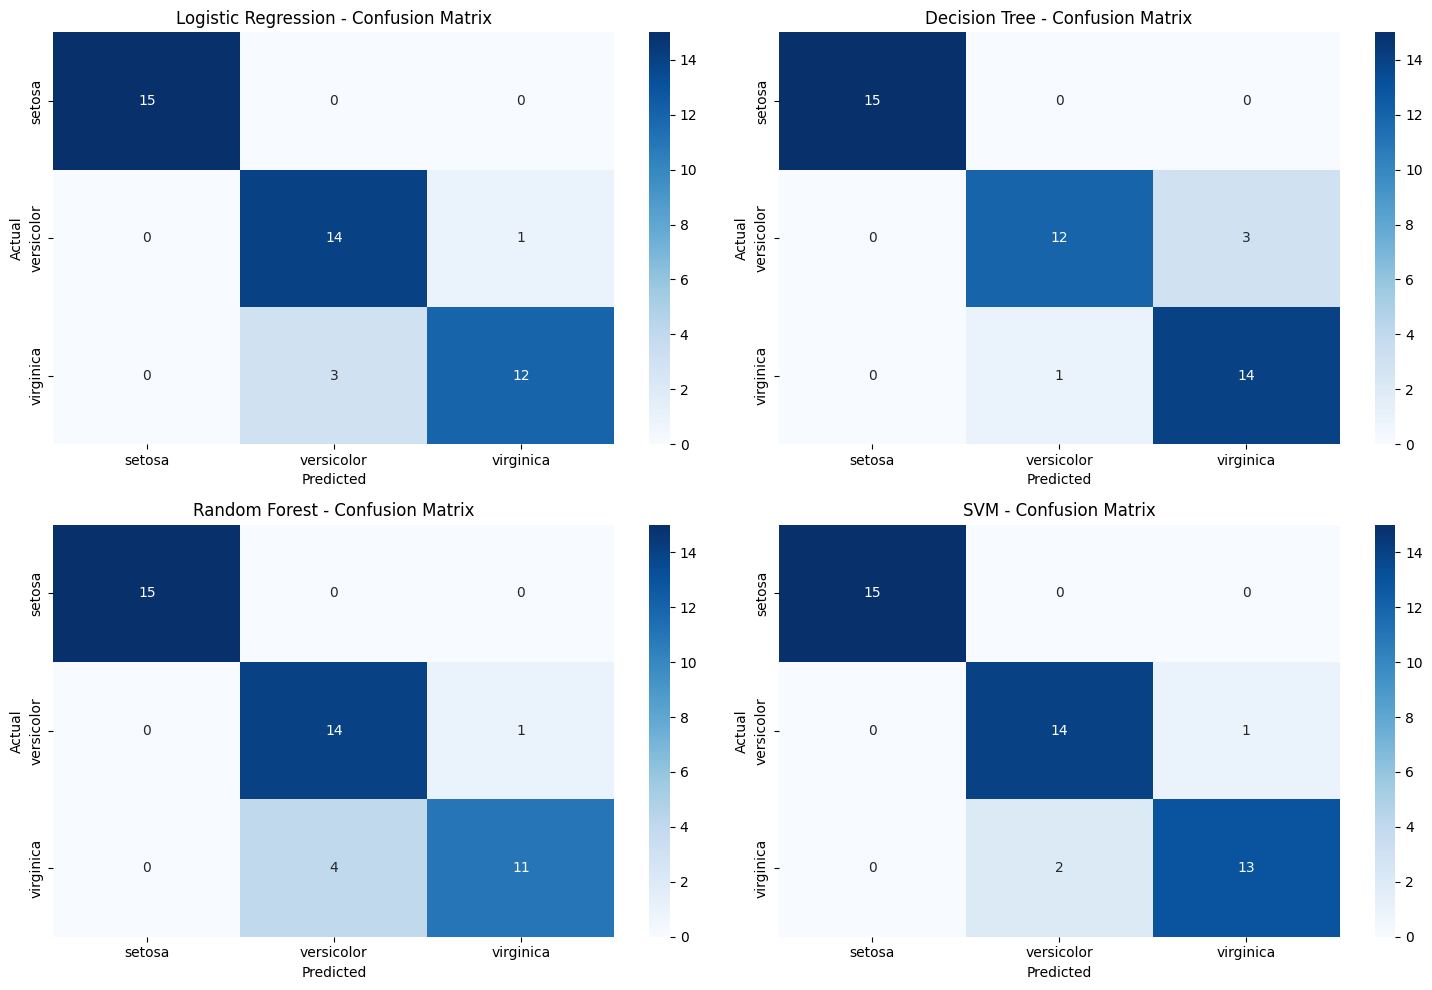

In [29]:
print("\nStep 2: Model Training & Evaluation (No Dimensionality Reduction)")
results_original = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test,
                                  title="Models with Original Features")


In [30]:
print("\nStep 3: Dimensionality Reduction with PCA")
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Step 3: Dimensionality Reduction with PCA


In [31]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

Explained variance ratio: [0.7264421  0.23378786]
Total explained variance: 0.9602


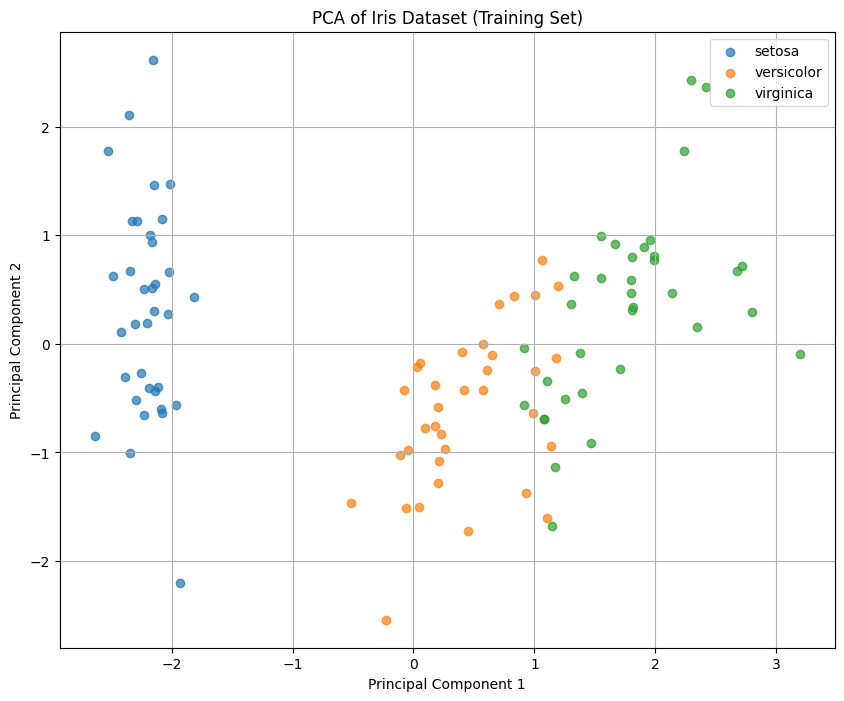

In [32]:
plt.figure(figsize=(10, 8))
for i, target in enumerate(target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                label=target, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (Training Set)')
plt.legend()
plt.grid(True)
plt.savefig('PCA_visualization.png')

In [33]:
print("\nStep 4: Dimensionality Reduction with LDA")
# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


Step 4: Dimensionality Reduction with LDA


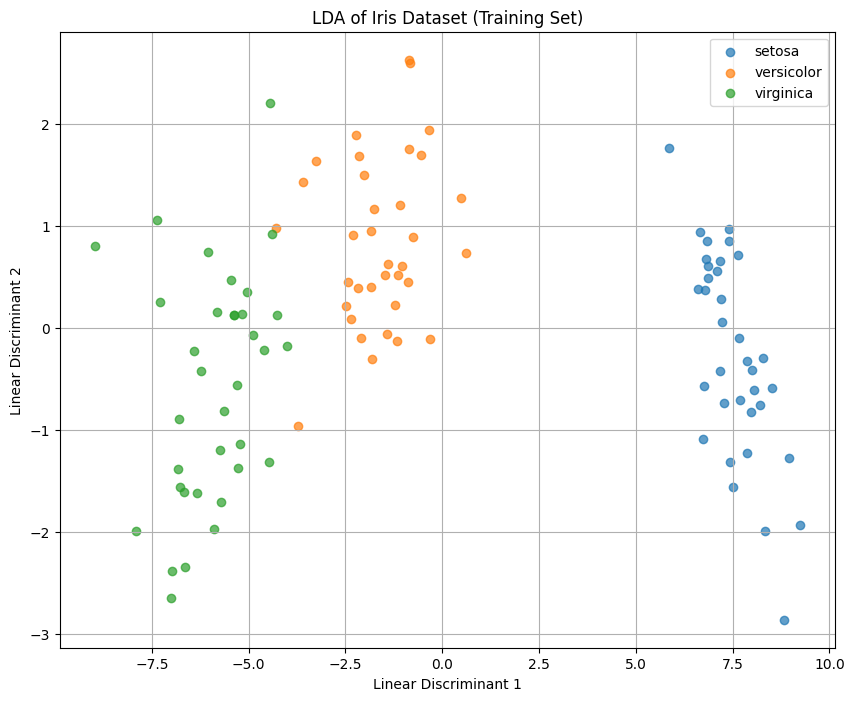

In [34]:
plt.figure(figsize=(10, 8))
for i, target in enumerate(target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1],
                label=target, alpha=0.7)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA of Iris Dataset (Training Set)')
plt.legend()
plt.grid(True)
plt.savefig('LDA_visualization.png')


Models with LDA Features
----------------------------------------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score  
----------------------------------------------------------------------------------------------------
Logistic Regression  0.9778     0.9792     0.9778     0.9778
Decision Tree        0.9778     0.9792     0.9778     0.9778
Random Forest        0.9778     0.9792     0.9778     0.9778
SVM                  0.9778     0.9792     0.9778     0.9778

Models with PCA Features
----------------------------------------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score  
----------------------------------------------------------------------------------------------------
Logistic Regression  0.8889     0.8981     0.8889     0.8878
Decision Tree        0.9111     0.9155     0.9111     0.9107
Random Forest        0.9333     0.9345     0.933

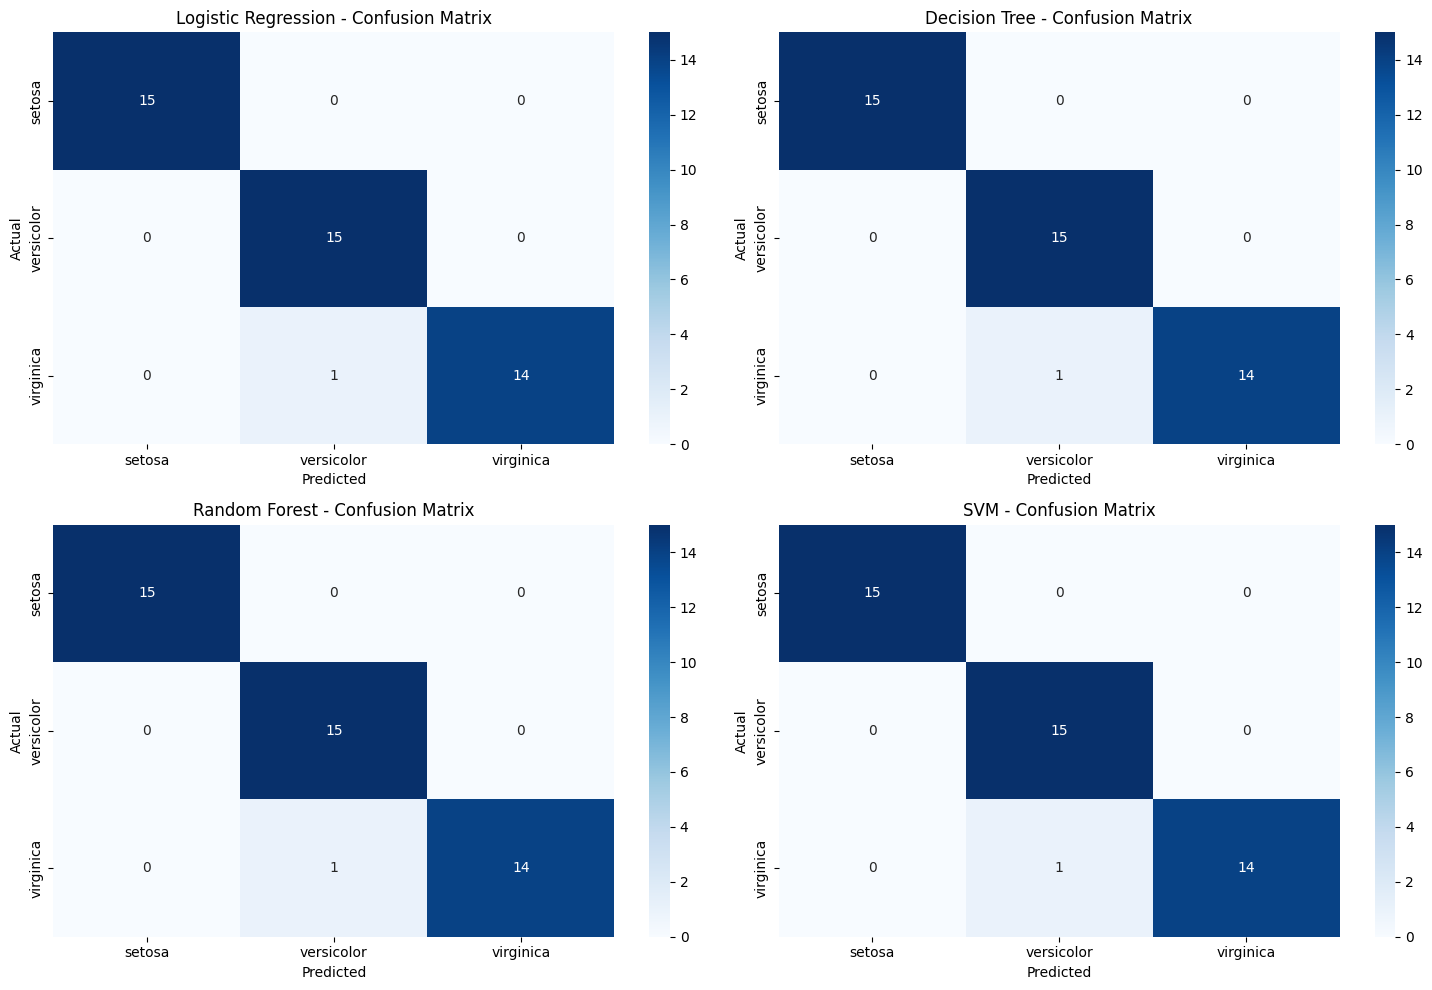

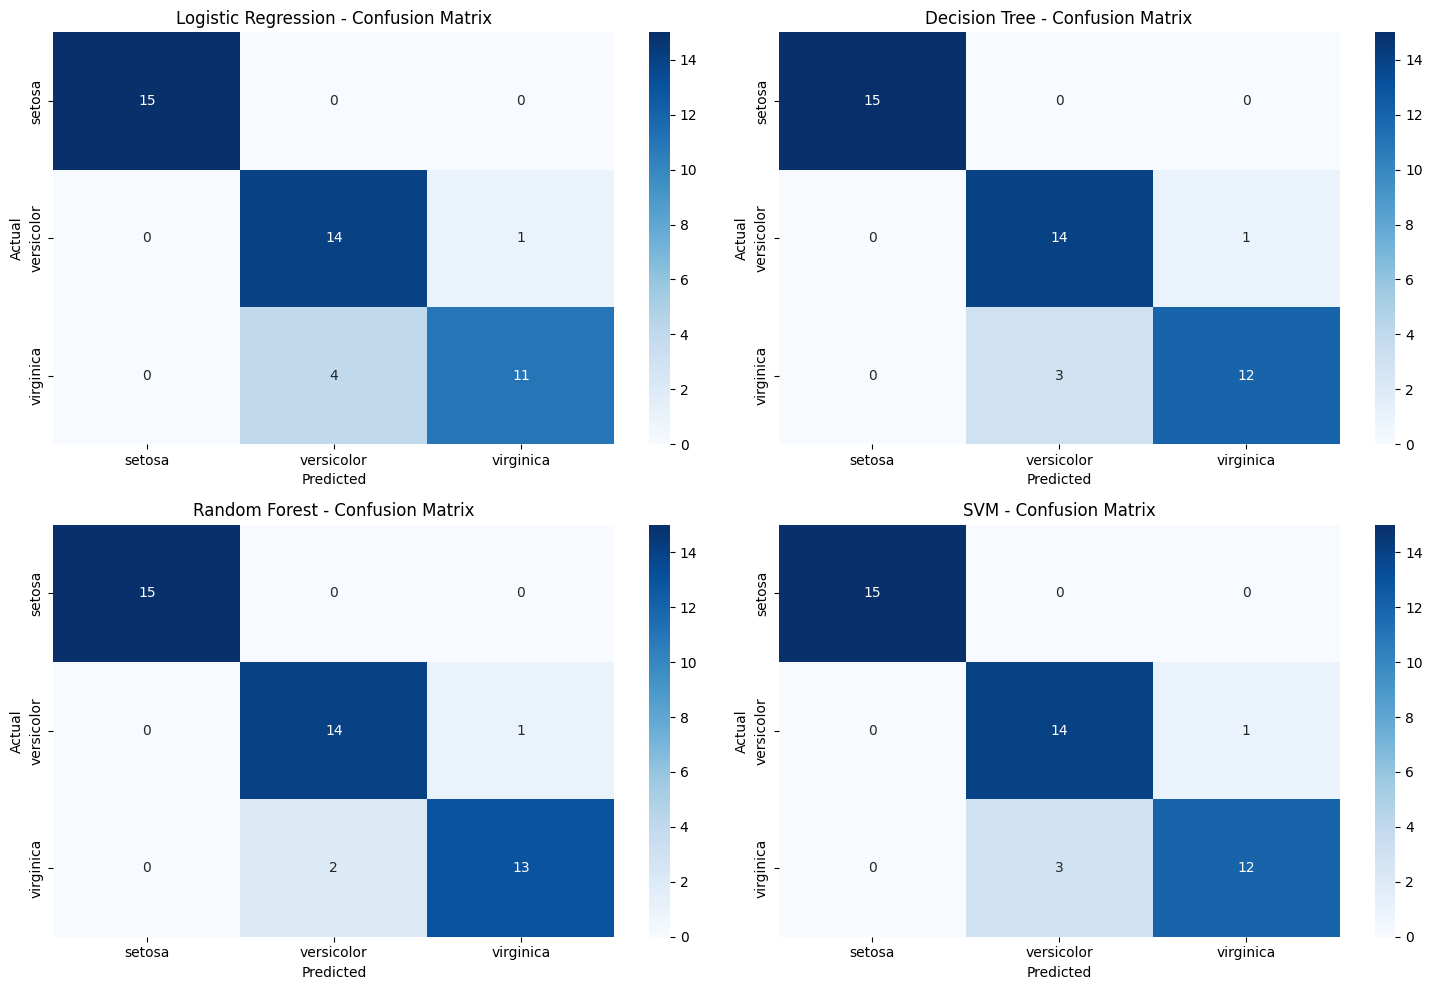

In [35]:
results_lda = evaluate_models(X_train_lda, X_test_lda, y_train, y_test,
                             title="Models with LDA Features")
results_pca = evaluate_models(X_train_pca, X_test_pca, y_train, y_test,
                             title="Models with PCA Features")

In [36]:
print("\nStep 5: Comparison and Analysis")
model_names = list(results_original.keys())
metrics = ['accuracy', 'precision', 'recall', 'f1']
comparison_data = []

for model_name in model_names:
    row = {
        'Model': model_name,
        'Original Accuracy': results_original[model_name]['accuracy'],
        'PCA Accuracy': results_pca[model_name]['accuracy'],
        'LDA Accuracy': results_lda[model_name]['accuracy'],
        'Original Precision': results_original[model_name]['precision'],
        'PCA Precision': results_pca[model_name]['precision'],
        'LDA Precision': results_lda[model_name]['precision'],
        'Original Recall': results_original[model_name]['recall'],
        'PCA Recall': results_pca[model_name]['recall'],
        'LDA Recall': results_lda[model_name]['recall'],
        'Original F1': results_original[model_name]['f1'],
        'PCA F1': results_pca[model_name]['f1'],
        'LDA F1': results_lda[model_name]['f1']
    }
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


Step 5: Comparison and Analysis
                 Model  Original Accuracy  PCA Accuracy  LDA Accuracy  \
0  Logistic Regression           0.911111      0.888889      0.977778   
1        Decision Tree           0.911111      0.911111      0.977778   
2        Random Forest           0.888889      0.933333      0.977778   
3                  SVM           0.933333      0.911111      0.977778   

   Original Precision  PCA Precision  LDA Precision  Original Recall  \
0            0.915535       0.898148       0.979167         0.911111   
1            0.915535       0.915535       0.979167         0.911111   
2            0.898148       0.934524       0.979167         0.888889   
3            0.934524       0.915535       0.979167         0.933333   

   PCA Recall  LDA Recall  Original F1    PCA F1    LDA F1  
0    0.888889    0.977778     0.910714  0.887767  0.977753  
1    0.911111    0.977778     0.910714  0.910714  0.977753  
2    0.933333    0.977778     0.887767  0.933259  0.97775

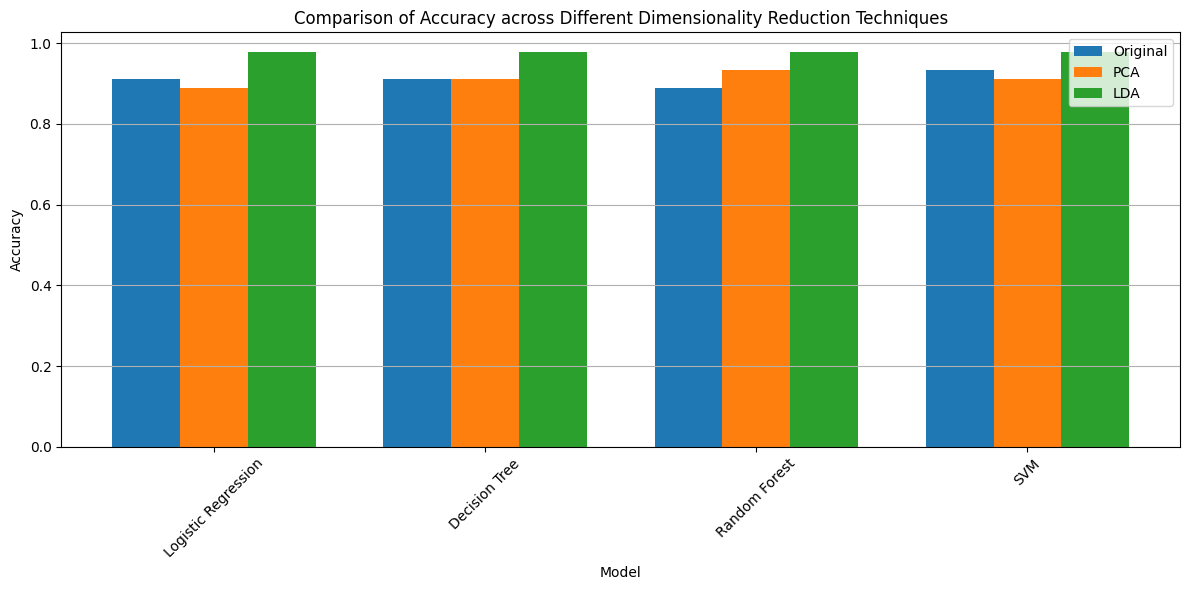

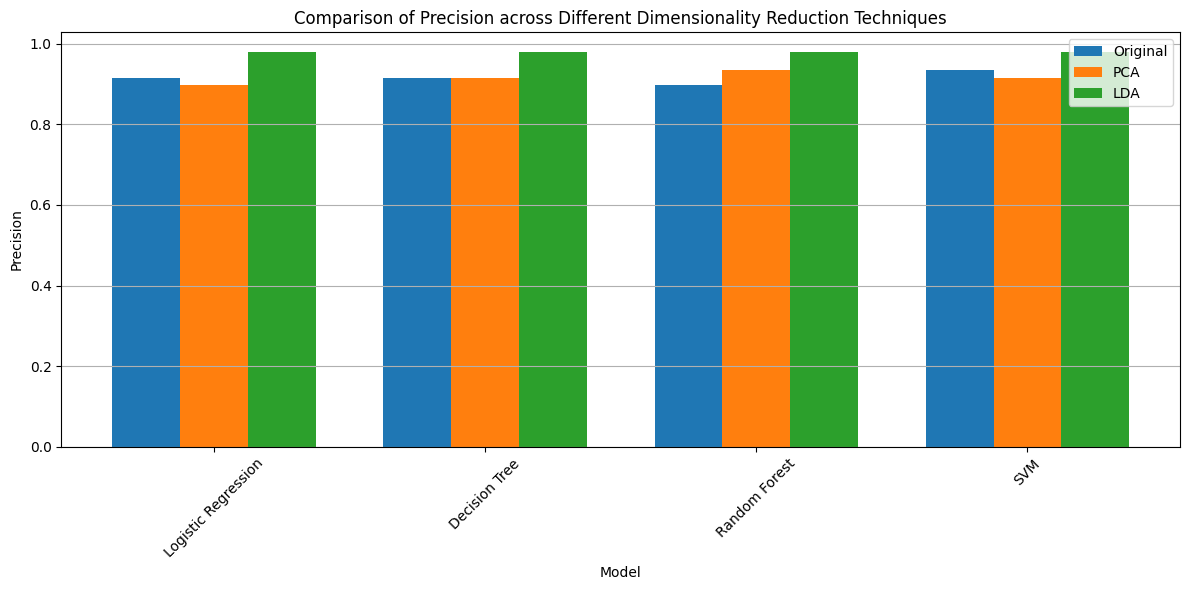

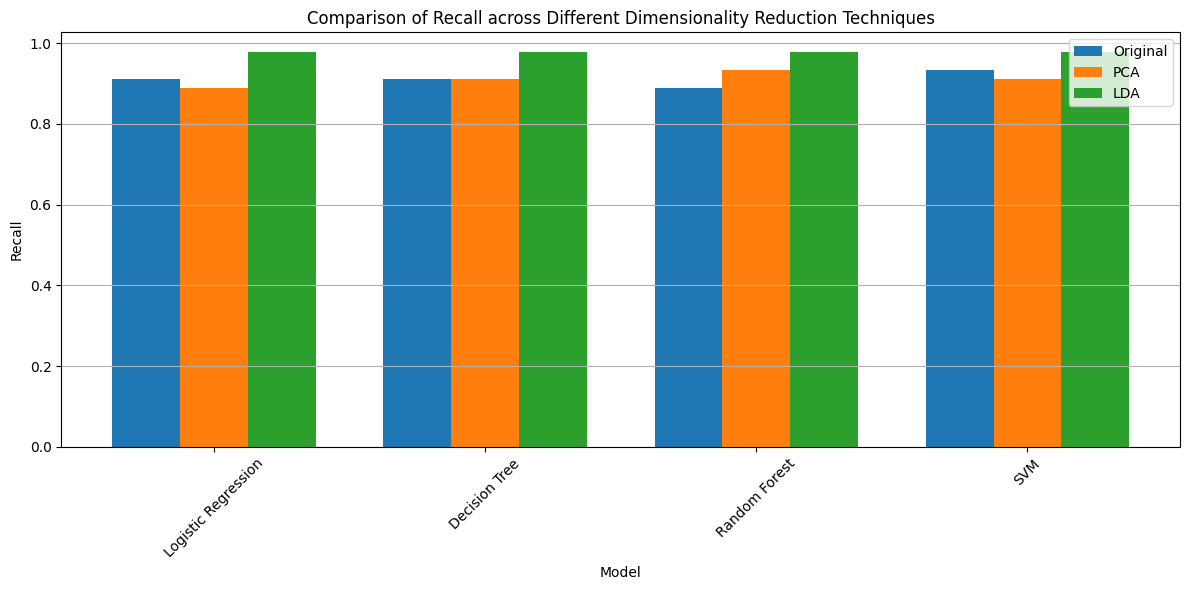

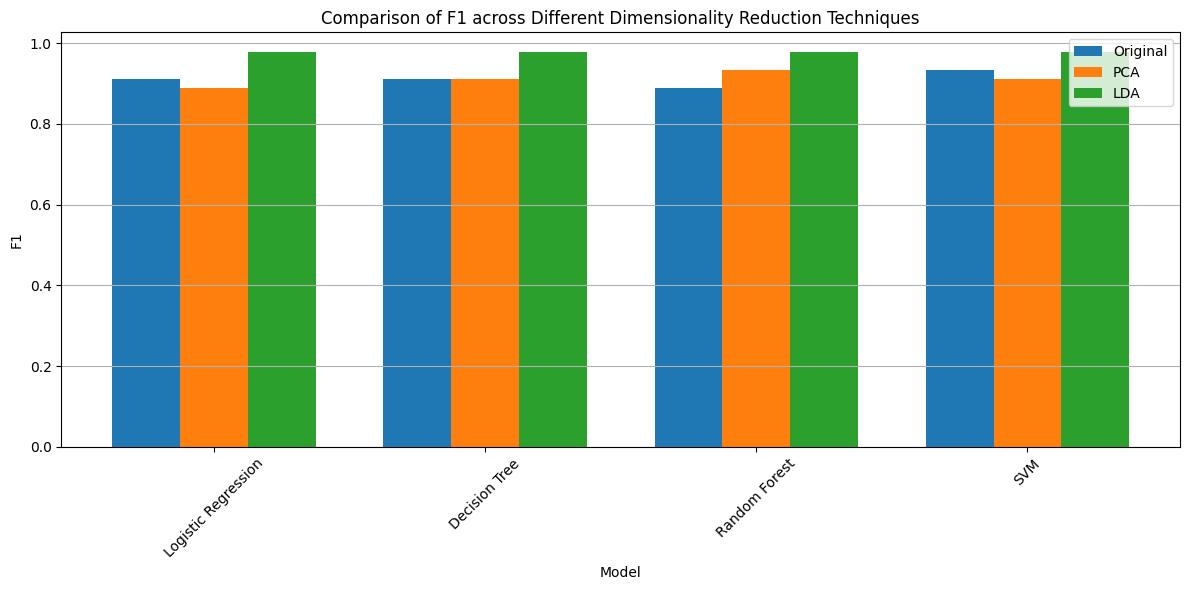

In [37]:
for metric in metrics:
    plt.figure(figsize=(12, 6))

    x = np.arange(len(model_names))
    width = 0.25

    plt.bar(x - width, comparison_df[f'Original {metric.capitalize()}'], width, label='Original')
    plt.bar(x, comparison_df[f'PCA {metric.capitalize()}'], width, label='PCA')
    plt.bar(x + width, comparison_df[f'LDA {metric.capitalize()}'], width, label='LDA')

    plt.xlabel('Model')
    plt.ylabel(f'{metric.capitalize()}')
    plt.title(f'Comparison of {metric.capitalize()} across Different Dimensionality Reduction Techniques')
    plt.xticks(x, model_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.savefig(f'comparison_{metric}.png')

In [38]:
print("\nAnalysis and Insights:")
print("1. Effect of dimensionality reduction on model performance:")
for model_name in model_names:
    original_acc = results_original[model_name]['accuracy']
    pca_acc = results_pca[model_name]['accuracy']
    lda_acc = results_lda[model_name]['accuracy']

    print(f"   - {model_name}:")
    print(f"     * Original vs PCA: {'Improved' if pca_acc > original_acc else 'Decreased'} by {abs(pca_acc - original_acc):.4f}")
    print(f"     * Original vs LDA: {'Improved' if lda_acc > original_acc else 'Decreased'} by {abs(lda_acc - original_acc):.4f}")
    print(f"     * PCA vs LDA: {'LDA better' if lda_acc > pca_acc else 'PCA better'} by {abs(lda_acc - pca_acc):.4f}")

print("\n2. Overall observations:")
print("   - LDA tends to perform better than PCA for classification tasks as it's a supervised technique")
print("   - PCA focuses on variance in features, while LDA focuses on class separability")
print("   - Decision Trees and Random Forests might be less affected by dimensionality reduction")
print("   - SVM and Logistic Regression may benefit more from appropriate dimensionality reduction")

print("\n3. Impact on computational efficiency:")
print("   - Reduced dimensions lead to faster training and inference times")
print("   - Memory requirements are lower with reduced dimensions")
print("   - Model complexity is reduced, which can help prevent overfitting")

print("\n4. Visualization benefits:")
print("   - PCA and LDA allow for 2D visualization of high-dimensional data")
print("   - LDA's visualization shows better class separation due to its supervised nature")
print("   - Visualizations provide insights into feature importance and class relationships")

print("\nConclusion:")
best_approach = "LDA" if comparison_df['LDA Accuracy'].mean() > max(comparison_df['Original Accuracy'].mean(), comparison_df['PCA Accuracy'].mean()) else "Original" if comparison_df['Original Accuracy'].mean() > comparison_df['PCA Accuracy'].mean() else "PCA"
print(f"For this Iris dataset classification task, the {best_approach} approach generally provides the best performance across models.")
print("The choice of dimensionality reduction technique should depend on the specific requirements of the task and computational constraints.")


Analysis and Insights:
1. Effect of dimensionality reduction on model performance:
   - Logistic Regression:
     * Original vs PCA: Decreased by 0.0222
     * Original vs LDA: Improved by 0.0667
     * PCA vs LDA: LDA better by 0.0889
   - Decision Tree:
     * Original vs PCA: Decreased by 0.0000
     * Original vs LDA: Improved by 0.0667
     * PCA vs LDA: LDA better by 0.0667
   - Random Forest:
     * Original vs PCA: Improved by 0.0444
     * Original vs LDA: Improved by 0.0889
     * PCA vs LDA: LDA better by 0.0444
   - SVM:
     * Original vs PCA: Decreased by 0.0222
     * Original vs LDA: Improved by 0.0444
     * PCA vs LDA: LDA better by 0.0667

2. Overall observations:
   - LDA tends to perform better than PCA for classification tasks as it's a supervised technique
   - PCA focuses on variance in features, while LDA focuses on class separability
   - Decision Trees and Random Forests might be less affected by dimensionality reduction
   - SVM and Logistic Regression may 